<a href="https://www.kaggle.com/code/yashpreetkr/heart-failure-prediction-analysis?scriptVersionId=218423619" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

Reading the data file

In [2]:
file_path = '/kaggle/input/heart-failure-prediction/heart.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.head())
print(df.info())
print(df.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

HeartDisease
1    508
0    410
Name: count, dtype: int64


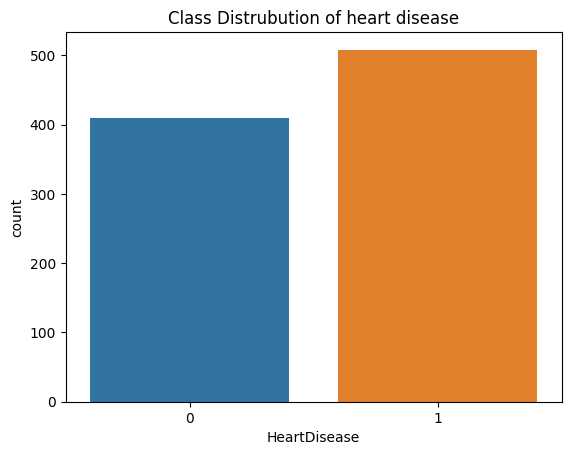

In [4]:
print(df["HeartDisease"].value_counts())
sns.countplot(x='HeartDisease', data=df)
plt.title("Class Distrubution of heart disease")
plt.show()


In [5]:
print(df['Cholesterol'].max())
print(df['Cholesterol'].describe())

603
count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: Cholesterol, dtype: float64


In [6]:
df["Cholesterol"] =  df["Cholesterol"].replace(0,np.nan)
df["Cholesterol"] = np.where(df["Cholesterol"] > 500, 500, df["Cholesterol"])

In [7]:
df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace= True)
print(df["Oldpeak"].describe())
print(df.isnull().sum())

count    918.000000
mean       0.887364
std        1.066570
min       -2.600000
25%        0.000000
50%        0.600000
75%        1.500000
max        6.200000
Name: Oldpeak, dtype: float64
Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64


/tmp/ipykernel_17/3500689525.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Oldpeak'].fillna(df['Oldpeak'].median(), inplace= True)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


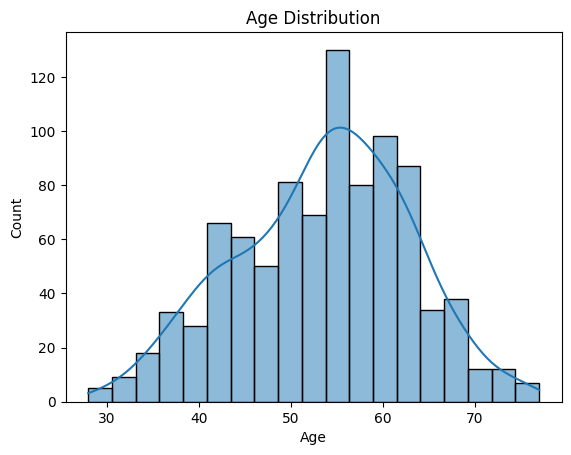

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


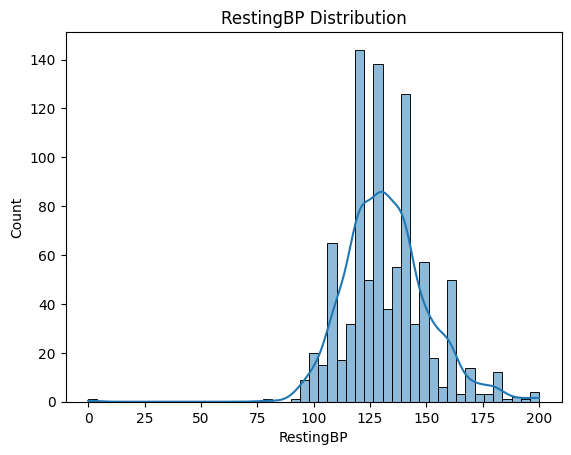

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


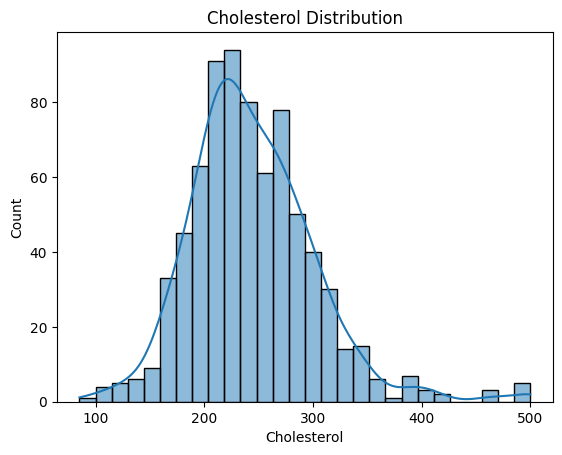

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


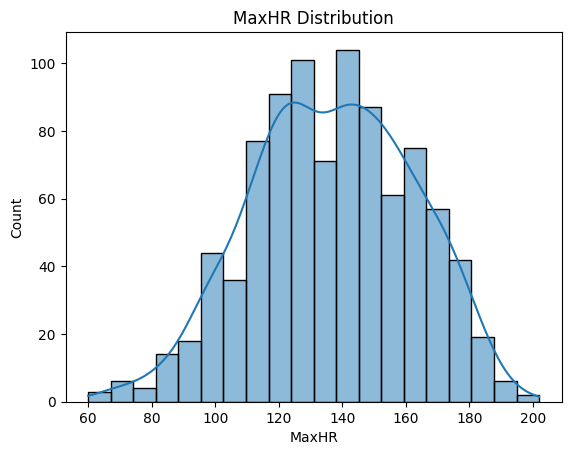

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


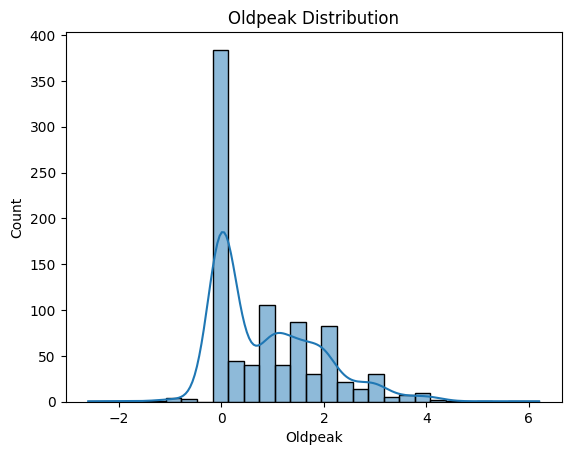

In [8]:
# Visualizing numerical features
numerical_features = ["Age", "RestingBP", "Cholesterol","MaxHR", "Oldpeak"]
for feature in numerical_features:
    sns.histplot(df[feature], kde = True)
    plt.title(f"{feature} Distribution")
    plt.show()

df["Cholesterol"] =  df["Cholesterol"].fillna(0).astype(int)

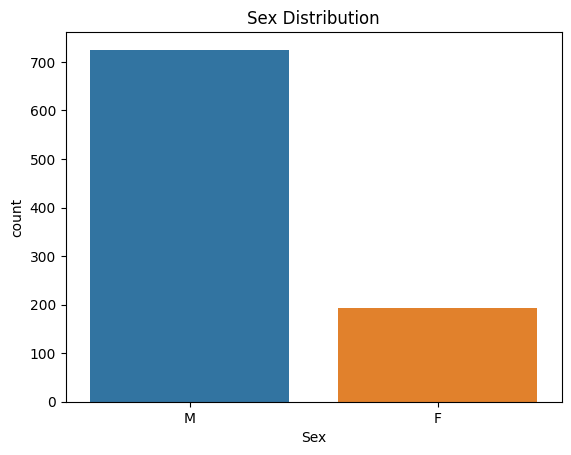

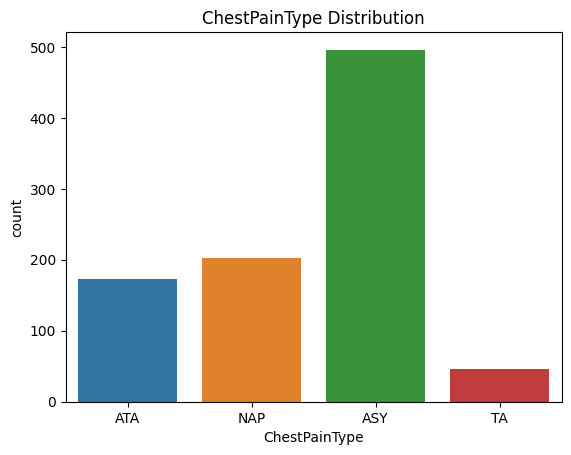

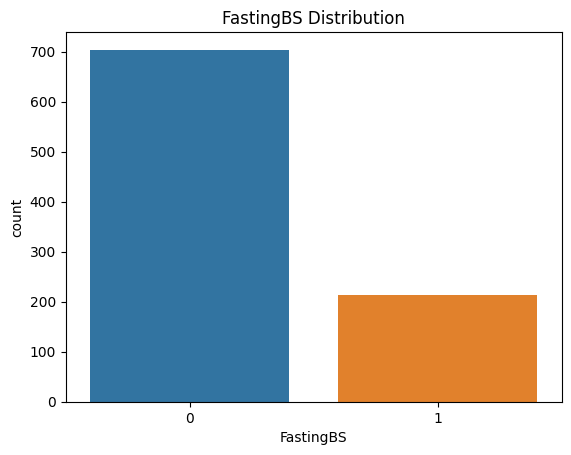

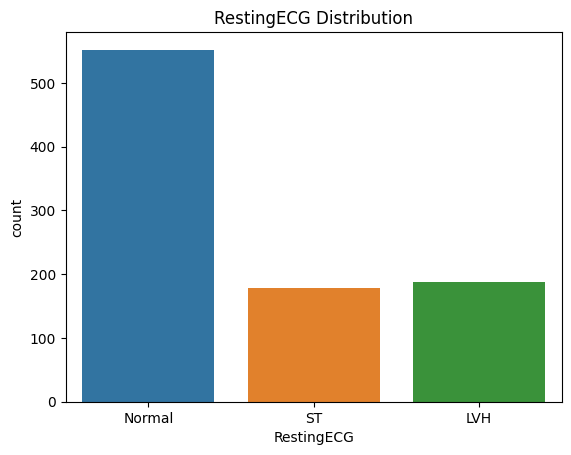

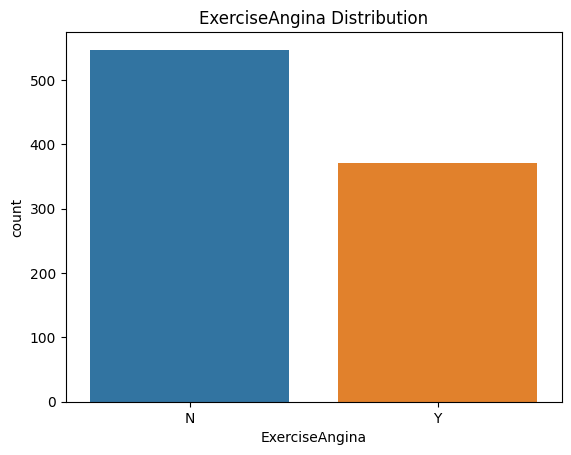

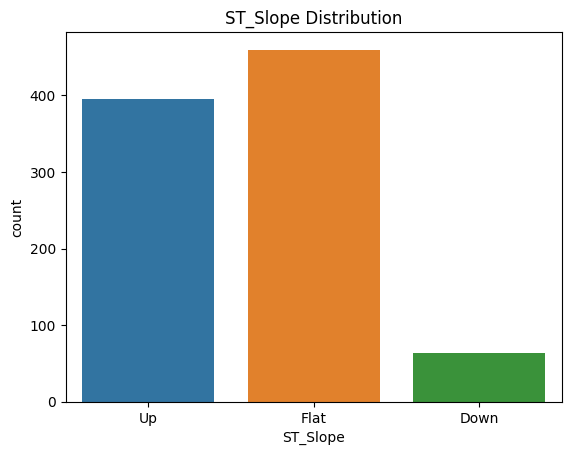

In [9]:
# Visualizing Catagorical features
categorical_features = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope"]
for feature in categorical_features:
    sns.countplot(x=feature, data=df)
    plt.title(f"{feature} Distribution")
    plt.show()


Conerting all the categorical features into int values.

In [10]:

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X = pd.get_dummies(X, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], drop_first=True)
X = X.astype(int)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (734, 15)
Testing set size: (184, 15)


In [12]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
print("Model coefficoents:", model.coef_)
y_pred = model.predict(X_test)

Model coefficoents: [[ 8.82991794e-03  2.41225624e-04 -4.69984859e-03  8.91338305e-01
  -3.71442457e-03  2.58614891e-01  1.23515035e+00 -1.14658531e+00
  -1.48319801e+00 -4.84087459e-01 -2.32886079e-01 -7.77510258e-02
   1.16375133e+00  1.16203834e+00 -1.27024917e+00]]


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy : .4f}')

Accuracy:  0.8859


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix: \n{conf_matrix}')

Confusion Matrix: 
[[68 14]
 [ 7 95]]


In [15]:
class_report = classification_report(y_test, y_pred)
print(f'Classification Matrix: \n{class_report}')

Classification Matrix: 
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        82
           1       0.87      0.93      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



In [16]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f'ROC-AUC Score: {roc_auc: .4f}')

ROC-AUC Score:  0.9311


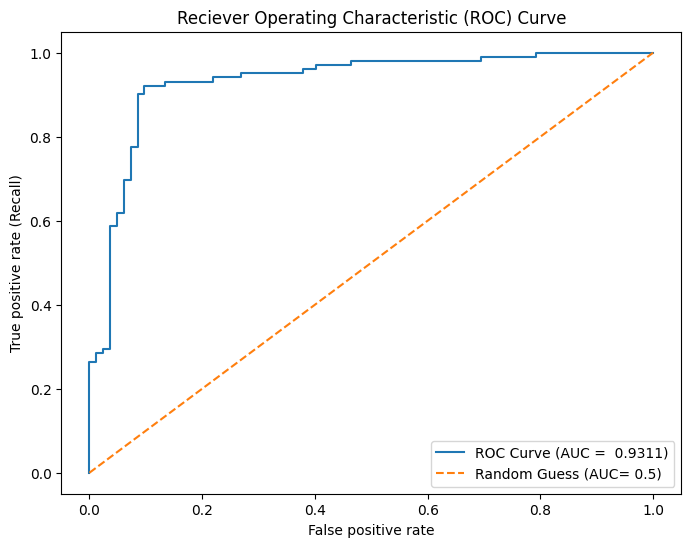

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc: .4f})')
plt.plot([0,1], [0,1], linestyle= '--', label='Random Guess (AUC= 0.5)' )
plt.xlabel('False positive rate')
plt.ylabel('True positive rate (Recall)')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend(loc= 'lower right')
plt.show() 